In [44]:
# Importing The Required Libraries
import numpy as np
import matplotlib as mplt
from matplotlib import pyplot as plt
import time

In [45]:
data_points = 15
data_point_multiplier = 5
num_coeffs = 3
coeff_multiplier = 2

# ax + b - coefficients being a, b
# ax^2 + bx + c - coefficients being a, b, c

# true coefficients are the expected value
true_coeffs = np.resize(
    np.random.random_sample(num_coeffs) * coeff_multiplier,
    (num_coeffs, 1)
)
print("\nTrue Coefficients:\n", true_coeffs, "\nDimensions: ", true_coeffs.shape)

x = (np.random.random_sample(data_points * num_coeffs) * data_point_multiplier).tolist()
x.sort()
X = np.empty((data_points, num_coeffs))
for i in range(data_points):
    X[i][0] = 1
    X[i][1] = x[i]
    if num_coeffs > 2:
        for j in range(2, num_coeffs):
            X[i][j] = X[i][1] ** j
            
print("\nMatrix X:\n", X, "\nDimensions: ", X.shape)

y = X.dot(true_coeffs)
print("\nMatrix Y:\n", y, "\nDimensions: ", y.shape)

# beta is the assumed weights or "our guess"
beta = np.resize(np.random.random_sample(num_coeffs), (num_coeffs, 1))
print("\nMatrix Beta:\n", beta, "\nDimensions: ", beta.shape)



True Coefficients:
 [[1.07273803]
 [1.23882581]
 [0.82801022]] 
Dimensions:  (3, 1)

Matrix X:
 [[1.         0.10422477 0.0108628 ]
 [1.         0.37873373 0.14343924]
 [1.         0.42812987 0.18329519]
 [1.         0.55669943 0.30991426]
 [1.         0.73122447 0.53468922]
 [1.         0.8187462  0.67034534]
 [1.         0.89235112 0.79629052]
 [1.         0.94699863 0.89680641]
 [1.         1.0906937  1.18961274]
 [1.         1.41419658 1.99995198]
 [1.         1.92756667 3.71551325]
 [1.         1.95603178 3.82606032]
 [1.         1.95838632 3.835277  ]
 [1.         1.95842805 3.83544044]
 [1.         2.02574838 4.10365648]] 
Dimensions:  (15, 3)

Matrix Y:
 [[1.21084888]
 [1.6606923 ]
 [1.75488665]
 [2.01900383]
 [2.42132591]
 [2.64207474]
 [2.83754232]
 [2.98846925]
 [3.40892905]
 [4.48066193]
 [6.53714031]
 [6.66393773]
 [6.67448611]
 [6.67467313]
 [6.98015691]] 
Dimensions:  (15, 1)

Matrix Beta:
 [[0.43146687]
 [0.04166935]
 [0.60177598]] 
Dimensions:  (3, 1)


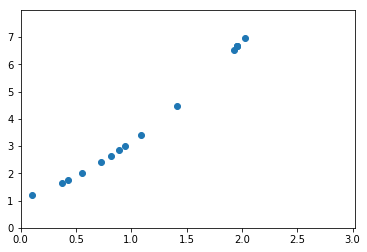

In [46]:
plt.axis([0, np.amax(X[:, 1]) + 1, 0, np.amax(y) + 1])
plt.scatter(X[:, 1], y)
plt.show()

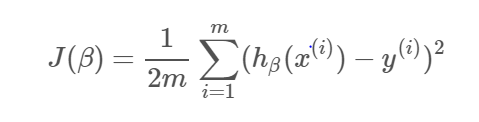

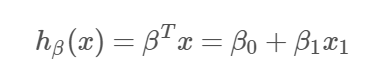  


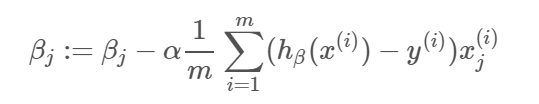

Gradient Term

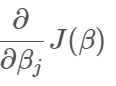


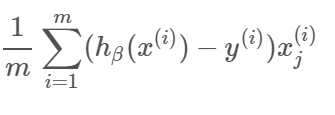

In [47]:
def cost_function(X, y, beta):
    # number of training examples
    m = len(y)

    # Calculate the cost with the given parameters
    J = np.sum((X.dot(beta) - y) ** 2) / (2 * m)

    return J

cost_function(X, y, beta)

3.5334022398293414

1. Calculate hypothesis hβ(x):

2. Calculate loss (hβ(x)−y):

3. Calculate gradient (hβ(x)−y)xj:

4. Update parameter beta:

5. And find the cost by using cost_function()

<Figure size 432x288 with 0 Axes>

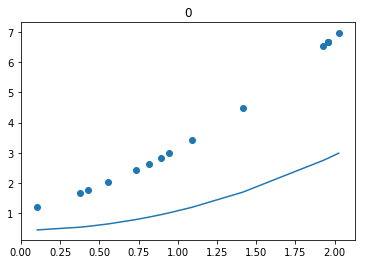

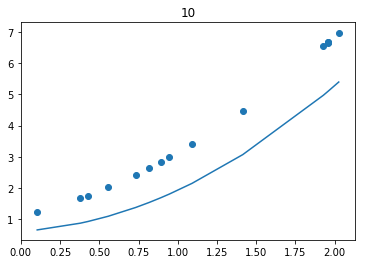

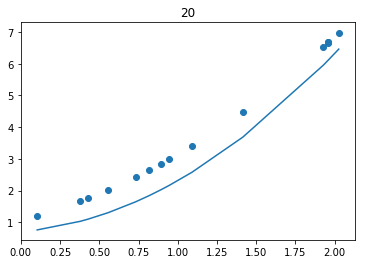

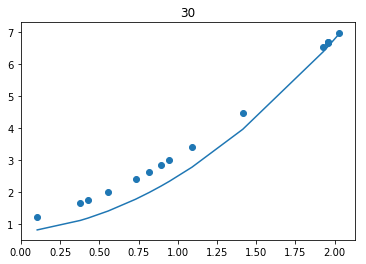

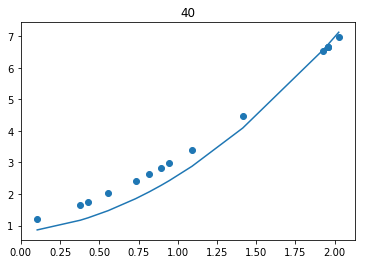

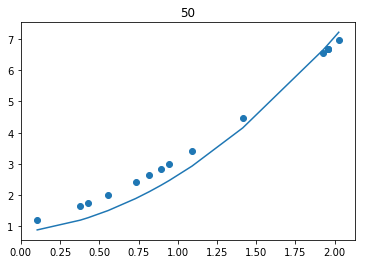

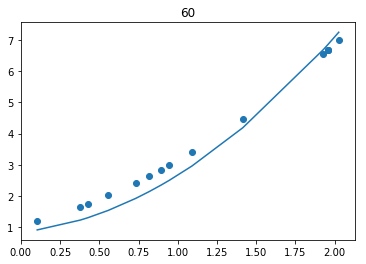

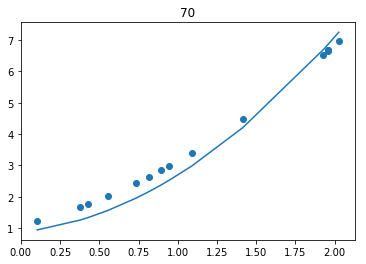

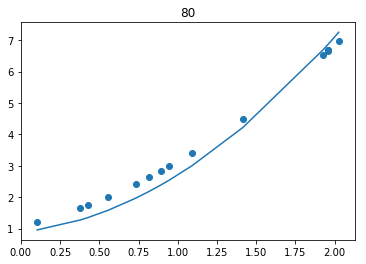

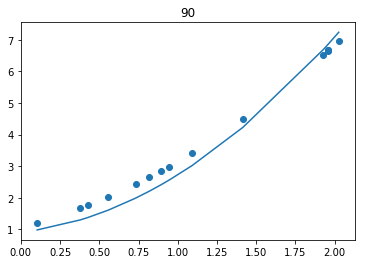

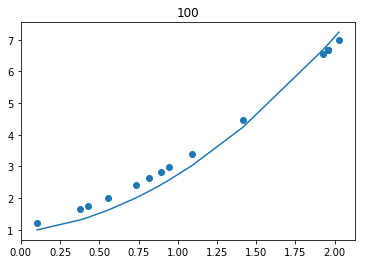

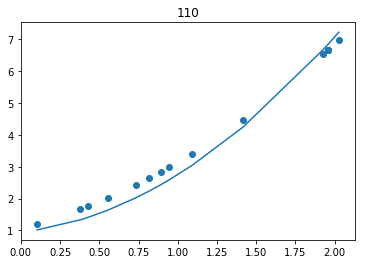

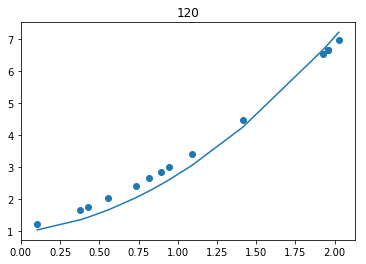

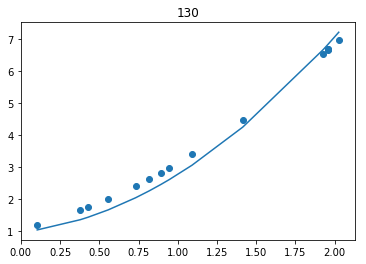

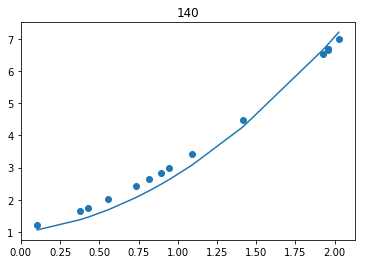

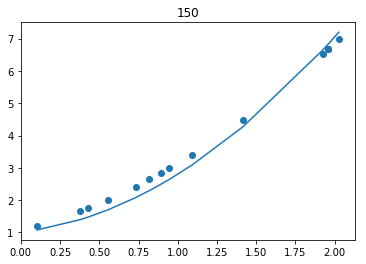

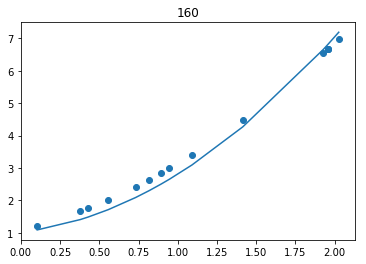

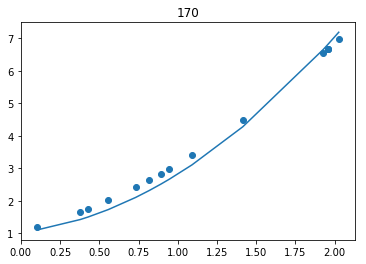

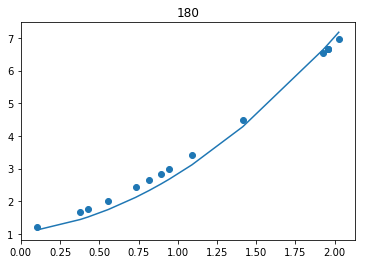

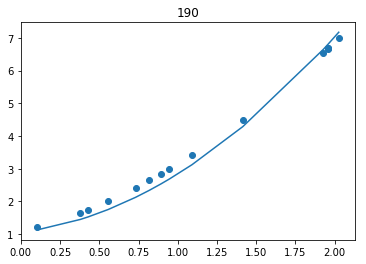

[[1.06898151]
 [0.58868846]
 [1.19430666]]
200


In [48]:
# Try changing the number of iterations until you find how long it takes to overfit
iterations = 200
# Then for the same number of iterations, increase and decrease alpha by atleast 10 times and see what happens 
alpha = 0.01
cost_history = [0] * iterations

def gradient_descent(X, y, beta, alpha, iterations):
    plt.figure()
    plt.show()
    m = len(y)
    
    for iteration in range(iterations):
        # Predictions / Hypothesis is X * beta (assumed weights)
        predictions = X.dot(beta)
        
        # Loss  = Our prediction -  real values
        loss = predictions - y
        
        """
        X transpose shape = (3, 15)
        loss shape = (15, 1)
        X tranpose * loss = (3, 1) which is the same shape as beta
        Gradient / Slope = X tranpose * Y
        """
        gradient = X.T.dot(loss) / m
        beta = beta - alpha * gradient
        
        # We calculate cost for analysis purposes 
        cost = cost_function(X, y, beta)
        cost_history[iteration] = cost
        
        # Below code is for plotting purposes
        if iteration % 10 == 0:
            plt.title(iteration)
            plt.scatter(X[:, 1], y)
            plt.plot(X[:, 1], predictions)
            plt.draw()
            plt.show()
            # time.sleep(0.5)
            plt.close()
        cost_history[iteration] = cost
    return beta

weights = gradient_descent(X, y, beta, alpha, iterations)
print(weights)
print(len(cost_history))


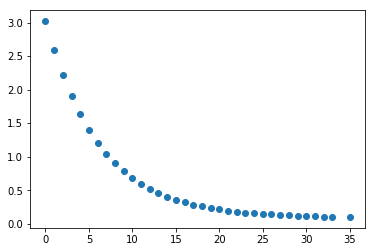

In [52]:
cost_range = 35
indexes = np.linspace(0, cost_range, cost_range, dtype='int')
plt.scatter(indexes, cost_history[:cost_range])
plt.show()

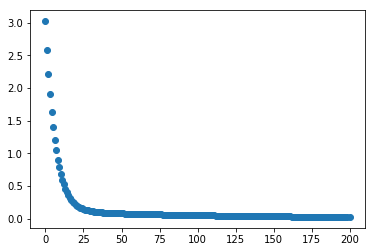

In [53]:
indexes = np.linspace(0, iterations, iterations, dtype='int')
plt.scatter(indexes, cost_history[:iterations])
plt.show()